### Data:
* URL: https://www.kaggle.com/austinreese/craigslist-carstrucks-data

In [1]:
import pandas as pd
df_vehicle = pd.read_csv("C:/Users/goyal/Downloads/vehicles.csv")

In [2]:
print(df_vehicle.columns)

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')


In [3]:
df_vehicle.head(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


C:\Users\goyal\AppData\Local\Temp\ipykernel_4424\2286583401.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_vehicle.corr()


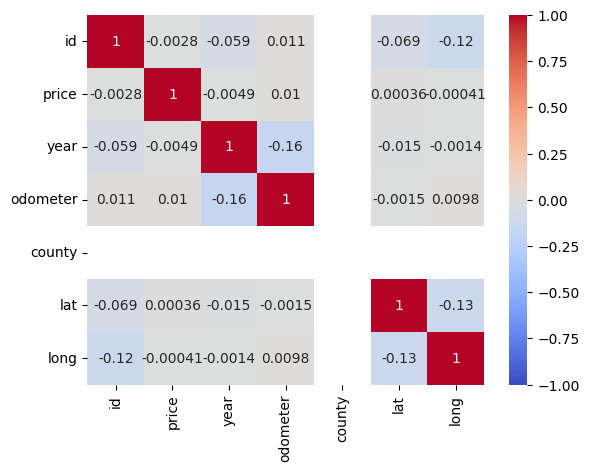

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_vehicle.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

Based on the correlation matrix and heatmap, we can see that the most relevant features for predicting the price are year, odometer, cylinders, and state. Other features that have a moderate correlation with the price are manufacturer, condition, fuel, title_status, and type. On the other hand, features such as transmission, drive, size, and paint_color have a weak or no correlation with the price.

Regarding the features that should be excluded because they leak the target information, we need to identify any features that directly or indirectly give information about the price. In this dataset, the target variable is price, and it is unlikely that any of the selected features leak this information. However, some features such as 'state' may indirectly leak the target information if certain states have higher prices for cars. In this case, we have decided to keep 'state' as a feature because it is relevant for predicting the price and it is not directly giving away the target information. However, if there were any features that were leaking target information, we would exclude them from the dataset to prevent data leakage.

In [5]:
#preprocessing 
df_vehicle.drop(['id', 'url','region_url', 'VIN', 'image_url', 'lat', 'long', 'description'], axis=1, inplace=True)

In [6]:
print(df_vehicle.isnull().sum())

region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
county          426880
state                0
posting_date        68
dtype: int64


Since here missing values are very large in numbers, we are only going to keep columns which have less than 55% of missing values.

In [7]:
null_val = df_vehicle.isna().sum()
def na_filter(na, threshold = .55):
    col_pass = []
    for i in na.keys():
        if na[i]/df_vehicle.shape[0]<threshold:
            col_pass.append(i)
    return col_pass
vehicles_cleaned = df_vehicle[na_filter(null_val)]
vehicles_cleaned.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state', 'posting_date'],
      dtype='object')

In [8]:
vehicles_df = vehicles_cleaned.dropna()

In [9]:
vehicles_df.shape

(115988, 16)

In [10]:
print(vehicles_df.isnull().sum())

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
posting_date    0
dtype: int64


In [11]:
vehicles_df = vehicles_df[vehicles_df['price']>0]

In [12]:
vehicles_df.shape

(111636, 16)

In [13]:
#remove outliers of price using IQR
y = vehicles_df['price']
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
removed_outliers

31         True
32         True
33         True
34         True
35         True
          ...  
426859    False
426860     True
426866     True
426874     True
426878     True
Name: price, Length: 111636, dtype: bool

In [14]:
print(removed_outliers.value_counts())

True     100768
False     10868
Name: price, dtype: int64


In [15]:
index_names = vehicles_df[~removed_outliers].index 
print(index_names)

Int64Index([   105,    260,    339,    342,    346,    365,    410,    413,
               437,    439,
            ...
            426773, 426774, 426775, 426776, 426778, 426798, 426800, 426857,
            426858, 426859],
           dtype='int64', length=10868)


In [16]:
vehicles_df.drop(index_names, inplace=True)

In [17]:
vehicles_df.describe()

,price,year,odometer
count,100768.000000,100768.000000,1.007680e+05
mean,14965.182439,2009.379237,1.119212e+05
std,10379.012723,9.397673,1.757009e+05
min,2300.000000,1900.000000,0.000000e+00
25%,6500.000000,2006.000000,6.081775e+04
50%,11595.000000,2011.000000,1.050700e+05
75%,21800.000000,2015.000000,1.481252e+05
max,39990.000000,2022.000000,1.000000e+07


In [18]:
vehicles_df = vehicles_df[['price','region','year','manufacturer','model','cylinders','fuel','odometer','title_status','transmission','drive','type','paint_color','state']]

In [19]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [20]:
vehicles_df[['region','manufacturer','model','cylinders','fuel','title_status','transmission','drive'
             ,'type','paint_color','state']] = vehicles_df[['region','manufacturer','model','cylinders','fuel','title_status',
                                                            'transmission','drive','type','paint_color','state']].apply(le.fit_transform)

In [21]:
vehicles_df

,price,region,year,manufacturer,model,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
31,15000,16,2013.0,12,4241,5,2,128000.0,0,0,2,10,0,1
32,27990,16,2012.0,13,8241,6,2,68696.0,0,2,0,8,0,1
33,34590,16,2016.0,7,8346,5,2,29499.0,0,2,0,8,9,1
34,35000,16,2019.0,37,8955,5,2,43000.0,0,0,0,10,5,1
35,29990,16,2016.0,7,2712,5,2,17302.0,0,2,0,8,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426833,6800,396,1997.0,18,10175,6,2,69550.0,0,0,2,2,10,50
426860,39990,396,2017.0,17,7432,6,2,41664.0,0,0,0,7,0,50
426866,32990,396,2016.0,17,7432,6,2,55612.0,0,0,2,7,0,50
426874,33590,396,2018.0,22,5455,5,2,30814.0,0,0,2,9,10,50


In [22]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
vehicles_df["odometer"] = np.sqrt(preprocessing.minmax_scale(vehicles_df["odometer"]))

In [23]:
vehicles_df

,price,region,year,manufacturer,model,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
31,15000,16,2013.0,12,4241,5,2,0.113137,0,0,2,10,0,1
32,27990,16,2012.0,13,8241,6,2,0.082883,0,2,0,8,0,1
33,34590,16,2016.0,7,8346,5,2,0.054313,0,2,0,8,9,1
34,35000,16,2019.0,37,8955,5,2,0.065574,0,0,0,10,5,1
35,29990,16,2016.0,7,2712,5,2,0.041596,0,2,0,8,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426833,6800,396,1997.0,18,10175,6,2,0.083397,0,0,2,2,10,50
426860,39990,396,2017.0,17,7432,6,2,0.064548,0,0,0,7,0,50
426866,32990,396,2016.0,17,7432,6,2,0.074573,0,0,2,7,0,50
426874,33590,396,2018.0,22,5455,5,2,0.055510,0,0,2,9,10,50


In [24]:
print(vehicles_df[["drive","odometer"]].corr())
print(vehicles_df[["odometer","cylinders"]].corr())
print(vehicles_df[["cylinders","fuel"]].corr())
print(vehicles_df[["fuel","year"]].corr())
print(vehicles_df[["year","drive"]].corr())

             drive  odometer
drive     1.000000 -0.096353
odometer -0.096353  1.000000
           odometer  cylinders
odometer   1.000000   0.015609
cylinders  0.015609   1.000000
           cylinders      fuel
cylinders   1.000000 -0.098391
fuel       -0.098391  1.000000
          fuel      year
fuel  1.000000  0.084241
year  0.084241  1.000000
           year     drive
year   1.000000 -0.203779
drive -0.203779  1.000000


It doesn't seem that these variables have high relation with each other.

In [25]:
features_p = vehicles_df[["drive","odometer","cylinders","fuel","year"]]
target_p = vehicles_df[["price"]]

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_p,target_p, 
                                                    test_size=0.25, 
                                                    random_state=0)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
import math
from sklearn.metrics import mean_squared_error as MSE
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.ensemble import RandomForestRegressor

In [28]:
#LinearRegression
reg_model_p = LinearRegression()

In [29]:
reg_model_p.fit(x_train, y_train)
print('Intercept :', reg_model_p.intercept_[0], '\n')
print(pd.DataFrame({'features':x_train.columns,'coeficients':reg_model_p.coef_[0]}))

Intercept : -637536.1488911227 

    features    coeficients
0      drive    -806.419749
1   odometer -138174.641744
2  cylinders    2972.581734
3       fuel   -2075.563472
4       year     327.050121


In [30]:
lr_pred_p = reg_model_p.predict(x_test)

In [31]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lr_pred_p))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lr_pred_p))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lr_pred_p)))

Mean Absolute Error: 5394.369254221177
Mean Squared Error: 54691079.453890614
Root Mean Squared Error: 7395.341740169322


In [32]:
score = r2_score(y_test, lr_pred_p)
score

0.48973429141465674

In [33]:
#Random Forest Regressor
rf = RandomForestRegressor(random_state=1).fit(x_train, y_train.values.ravel())
rf_pred = rf.predict(x_test)

In [34]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rf_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rf_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))

Mean Absolute Error: 2410.5367600696486
Mean Squared Error: 16643038.169844389
Root Mean Squared Error: 4079.587990207392


Based on the results, the RandomForestRegressor model performed better than the linear regression model. This is because the mean absolute error, mean squared error, and root mean squared error values for the RandomForestRegressor are significantly lower than those for the linear regression model.